<a href="https://colab.research.google.com/github/Sagargupta16/ML-Lab-Codes/blob/main/ML_LAB_6(Back_Prop_Xor).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


xor_input = np.array([[0,0],[0,1],[1,0],[1,1]])
xor_output = np.array([[0],[1],[1],[0]])

epochs = 10000
learning_rate = 0.1
inputLayer=2
hiddenLayer=2
outputLayer=1

hidden_weights = np.random.uniform(size=(inputLayer, hiddenLayer))
hidden_bias = np.random.uniform(size=(1, hiddenLayer))
out_weights = np.random.uniform(size=(hiddenLayer, outputLayer))
out_bias = np.random.uniform(size=(1, outputLayer))

print("Start backpropagation hidden weights:   \n", end='')
print(*hidden_weights)
print("Start backpropagation output weights:   \n", end='')
print(*out_weights)
x=out_weights


# Training algorithm
for i in range(epochs):
    # Forward Propagation
    hidden_layer_activation = np.dot(xor_input, hidden_weights)
    hidden_layer_activation += hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_activation)

    out_layer_activation = np.dot(hidden_layer_output, out_weights)
    out_layer_activation += out_bias
    predicted_out = sigmoid(out_layer_activation)

    # Backpropagation
    error = xor_output - predicted_out
    b_predicted_output = error * sigmoid_derivative(predicted_out)
    error_hidden_layer = b_predicted_output.dot(out_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Updating weights and biases
    out_weights += hidden_layer_output.T.dot(b_predicted_output) * learning_rate
    out_bias += np.sum(b_predicted_output, axis=0, keepdims=True) * learning_rate
    hidden_weights += xor_input.T.dot(d_hidden_layer) * learning_rate
    hidden_weights += xor_input.T.dot(d_hidden_layer) * learning_rate
    hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    loss = 0.5*np.mean((xor_output-predicted_out)**2)
    if i%1000==0 or i==9999:
      print(f"epochs: {i}  Loss: {loss}")

print("\nEnd backpropagation hidden weights: \n", end='')
print(*hidden_weights)
print("End backpropagation output weights: \n", end='')
print(*out_weights)

print("\nNon-formatted output from neural network: \n", end='')
print(*predicted_out)

output_format = np.around(predicted_out, decimals=0)
output_format = output_format.flatten()
print("X1  X2    Y")
print("0   0   ",output_format[0])
print("0   1   ",output_format[1])
print("1   0   ",output_format[2])
print("1   1   ",output_format[3])

Start backpropagation hidden weights:   
[0.21159758 0.28026829] [0.11710504 0.68925187]
Start backpropagation output weights:   
[0.88029896] [0.38637573]
epochs: 0  Loss: 0.1744473845882738
epochs: 1000  Loss: 0.12499866997288676
epochs: 2000  Loss: 0.12496081060391649
epochs: 3000  Loss: 0.12480580075873034
epochs: 4000  Loss: 0.12283978451533573
epochs: 5000  Loss: 0.10028930690579421
epochs: 6000  Loss: 0.07115097355742189
epochs: 7000  Loss: 0.01740578281712203
epochs: 8000  Loss: 0.006273003105540086
epochs: 9000  Loss: 0.0035486082823108747
epochs: 9999  Loss: 0.0024192641861344984

End backpropagation hidden weights: 
[6.44557122 3.7041922 ] [6.50863716 3.71118851]
End backpropagation output weights: 
[6.76581468] [-7.2791285]

Non-formatted output from neural network: 
[0.07100374] [0.93335227] [0.93319798] [0.07354015]
X1  X2    Y
0   0    0.0
0   1    1.0
1   0    1.0
1   1    0.0


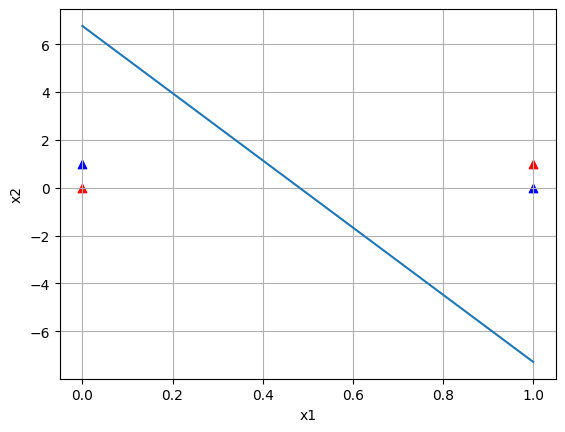

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[0][0],X[0][1], c='red' , marker='^')
plt.scatter(X[3][0],X[3][1], c='red' , marker='^')
plt.scatter(X[1][0],X[1][1], c='blue' , marker='^')
plt.scatter(X[2][0],X[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")

plt.plot(out_weights)
plt.grid()
plt.show()